# 中文主題模型

- Time: 2019/09/24
- Author: Daniel Hu (University of Melbourne)

In [97]:
import re
import pandas as pd
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# import jieba 並使用繁中字典
import jieba as jp
jieba.set_dictionary("extra_dict/dict.txt.big")

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('20190623-keyword_Pilot.xlsx')
# print(df.__journalist.unique())
print(df.__content_text.head())
# df.head()

0    直播／空服員突擊罷工 旅行公會轟政府沒作為：不排除上街抗議\n 長榮空服員罷工至今邁入第4天...
1    長榮航空空服員罷工進入第四天，今天上午一陣大雨，罷工空服員在長榮航空門口的帳棚內，穿著雨衣、...
2    （中央社記者吳欣紜台北23日電）勞動部長許銘春昨天探視罷工的長榮空服員後，勞動部臉書被許多留...
3    長榮航空勞資協商破局，空服員20日起無限期罷工，美女主播蕭彤雯也成受災戶，4個月前就訂好本週...
4    生活中心／綜合報導長榮航空空服員罷工今（23）日進入第4天，受到罷工風波影響，許多航班被迫取...
Name: __content_text, dtype: object


In [184]:
punct = set(['。', '，', '、', '；', '：', '？', '！', '「', '」', '『', '』', '──', '—', '……', '…', '（', '）', '〔', '〕', '《', '》', '〈', '〉', '．', '／'])
common_words = set(['長榮', '航空', '罷工', '也', '表示', '會'])

# 讀取停用字清單
with open("extra_dict/stop_words.txt") as f:
    stopwords = f.readlines()
stopwords = set([x.strip() for x in stopwords])

stopwords = stopwords.union(punct)
stopwords = stopwords.union(common_words)

print(stopwords)

{'妳們', 'we', 'with', '是', '就', '長榮', '及', '是否', '、', 'an', 'which', 'on', 'you', 'all', '』', 'as', 'by', 'not', 'this', 'be', '《', '的', '…', '」', '一個', 'if', '．', 'of', 'and', '）', '……', '航空', 'at', '；', '（', 'it', '「', 'has', '著', '，', '──', '也', '。', '和', 'to', 'have', 'one', 'the', '而', '》', 'can', '了', '罷工', '你們', 'in', '會', '〈', '—', 'for', '『', '〕', 'from', '表示', '與', '她們', '〉', '都', '：', '或', '沒有', '？', '我們', 'or', '！', 'then', 'is', 'that', '〔', '／', '他們', 'are'}


In [185]:
# Convert to list
data = df.__content_text.values.tolist()

data = [sent.replace('\\n', '') for sent in data]
data = [sent.replace(' ', '') for sent in data]

pprint(data[:1])

['直播／空服員突擊罷工旅行公會轟政府沒作為：不排除上街抗議長榮空服員罷工至今邁入第4天，台北市旅行商業同業公會今（23日）下午2點舉行記者會不滿指出，罷工事件已影響旅行業及消費者權益，損失難以估算，怒批罷工事件在台灣不是首次發生，但「最會溝通的政府」卻毫無作為，各部會互相推卸，要求快點解決罷工亂象，否則不排除走上街頭抗議。']


In [186]:
words_list = []
for doc in data:
    words = set([w for w in jp.cut(doc) if w not in stopwords])
    words_list.append(list(words))
print(words_list[:1])

[['不滿', '事件', '怒批', '在', '轟', '作為', '否則', '點', '排除', '但', '商業', '推卸', '最會', '發生', '各部', '已', '不是', '台灣', '直播', '互相', '政府', '損失', '走上', '難以', '要求', '毫無', '影響', '解決', '4', '估算', '台北市', '旅行', '權益', '沒作', '為', '23', '記者會', '首次', '下午', '日', '空服員', '同業公會', '突擊', '抗議', '今', '旅', '至今', '指出', '第', '邁入', '亂象', '2', '不', '消費者', '溝通', '舉行', '街頭', '快點', '卻', '公會', '行業', '上街', '天']]


In [187]:
# Create Dictionary
id2word = corpora.Dictionary(words_list)

# Create Corpus
texts = words_list

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)]]


In [205]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=4)
# Print the Keyword in the topics
pprint(lda_model.print_topics())

[(0,
  '0.005*"空服員" + 0.005*"在" + 0.004*"旅客" + 0.004*"有" + 0.003*"日" + 0.003*"記者" + '
  '0.003*"分享" + 0.003*"影響" + 0.003*"對" + 0.003*"第"'),
 (1,
  '0.004*"在" + 0.003*"空服員" + 0.003*"有" + 0.003*"日" + 0.003*"但" + 0.003*"工會" + '
  '0.003*"到" + 0.002*"影響" + 0.002*"要" + 0.002*"為"'),
 (2,
  '0.005*"在" + 0.004*"空服員" + 0.004*"有" + 0.004*"但" + 0.004*"不" + 0.003*"工會" + '
  '0.003*"說" + 0.003*"要" + 0.003*"為" + 0.003*"日"'),
 (3,
  '0.004*"影響" + 0.003*"有" + 0.003*"空服員" + 0.003*"旅客" + 0.003*"在" + 0.003*"不" + '
  '0.003*"要" + 0.003*"但" + 0.002*"記者" + 0.002*"天"')]


In [206]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.573880165395023

Coherence Score:  0.24697754591237794


In [142]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [164]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_list, start=1, limit=40, step=1)

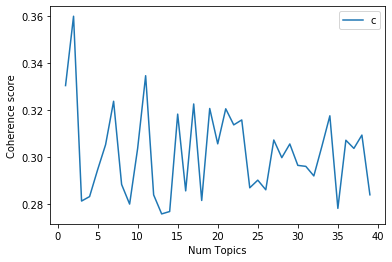

In [165]:
# Show graph
limit=40; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [166]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3304
Num Topics = 2  has Coherence Value of 0.36
Num Topics = 3  has Coherence Value of 0.2812
Num Topics = 4  has Coherence Value of 0.2831
Num Topics = 5  has Coherence Value of 0.2945
Num Topics = 6  has Coherence Value of 0.3052
Num Topics = 7  has Coherence Value of 0.3237
Num Topics = 8  has Coherence Value of 0.2883
Num Topics = 9  has Coherence Value of 0.2799
Num Topics = 10  has Coherence Value of 0.3036
Num Topics = 11  has Coherence Value of 0.3346
Num Topics = 12  has Coherence Value of 0.2838
Num Topics = 13  has Coherence Value of 0.2757
Num Topics = 14  has Coherence Value of 0.2767
Num Topics = 15  has Coherence Value of 0.3182
Num Topics = 16  has Coherence Value of 0.2855
Num Topics = 17  has Coherence Value of 0.3226
Num Topics = 18  has Coherence Value of 0.2814
Num Topics = 19  has Coherence Value of 0.3206
Num Topics = 20  has Coherence Value of 0.3056
Num Topics = 21  has Coherence Value of 0.3205
Num Topics = 22  has Coh

In [207]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/hyhu/anaconda3/envs/topicmodel/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000964  0.006749       1        1  35.416553
0     -0.015031 -0.001586       2        1  32.676647
3      0.006738 -0.012096       3        1  21.614965
1      0.009257  0.006933       4        1  10.291837, topic_info=    Category        Freq Term       Total  loglift  logprob
26   Default  253.000000   影響  253.000000  30.0000  30.0000
119  Default  230.000000   工會  230.000000  29.0000  29.0000
13   Default  273.000000    但  273.000000  28.0000  28.0000
37   Default  261.000000    日  261.000000  27.0000  27.0000
87   Default  222.000000    到  222.000000  26.0000  26.0000
..       ...         ...  ...         ...      ...      ...
2     Topic4   17.462723    4  187.535446  -0.1001  -6.3203
25    Topic4   17.018795    已  195.185104  -0.1658  -6.3461
337   Topic4   18.148211   旅客  256.521912  -0.3748  -6.2818
169   Topic4   16.715340   進入  184.598297  -0.1280  -6.3641
24    Topic4   16.798088    天  202.250153  -0.2144  -6.3592

[349 rows x 6 columns], token_table=      Topic      Freq Term
term                      
288       1  0.449978   20
288       2  0.286942   20
288       3  0.182600   20
288       4  0.078257   20
183       1  0.230962   22
...     ...       ...  ...
5434      4  0.568314   驟雨
9638      1  0.518148   體制
5860      1  0.768560   齊喊
5860      2  0.256187   齊喊
5860      3  0.256187   齊喊

[808 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])